<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-285 - Computación Científica </h1>
    <h2> Class zero - a mix of some Jupyter Notebooks and more </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.02 </h2>
</center>


<div id='toc' />

## Table of Contents
* [Introduction](#intro)
* [NumPy](#numpy)
* [MatPlotLib](#matplotlib)
* [SciPy](#scipy)
* [Advanced Examples](#advanced)
* [Libraries](#libraries)
* [Acknowledgements](#acknowledgements)
* [Some Numerical Solutions](#NumericalSolutions)

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as sym

from scipy.integrate import odeint
import scipy.linalg as spla
from scipy import optimize, interpolate
from scipy.linalg import solve_triangular, toeplitz, lu
from scipy.optimize import root
# conda install bitstring
# import bitstring as bs

%matplotlib inline

sym.init_printing()
from ipywidgets import interact, widgets, fixed, IntSlider, interact_manual, Checkbox, RadioButtons
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from matplotlib import cm

# pip install memory_profiler
# %load_ext memory_profiler

from sklearn import datasets
from colorama import Fore, Back, Style
# https://pypi.org/project/colorama/
# Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Style: DIM, NORMAL, BRIGHT, RESET_ALL
textBold = lambda x: Style.BRIGHT+x+Style.RESET_ALL
textBoldH = lambda x: Style.BRIGHT+Back.YELLOW+x+Style.RESET_ALL
textBoldB = lambda x: Style.BRIGHT+Back.BLUE+Fore.BLACK+x+Style.RESET_ALL
textBoldR = lambda x: Style.BRIGHT+Back.RED+Fore.BLACK+x+Style.RESET_ALL

<div id='intro' />

# Introduction
[Back to TOC](#toc)

In this jupyter notebook we will quickly review important concepts and suggestions when implementing solutions in Scientific Computing.

<div id='numpy' />

# NumPy, the core of numerical computing in Python
[Back to TOC](#toc)

We strongly suggest to take a look to the associated paper explaning Arrays in NumPy [link](https://www.nature.com/articles/s41586-020-2649-2).
Now, we will start with some examples provided in Fig. 1 from the previous reference. Also see https://numpy.org.

In [2]:
# NumPy array
a1 = np.arange(12)
# NumPy ndarray
a2 = np.array([[1, 2, 3], [4, 5, 6]], float)
a3 = np.reshape(a1,(4,3))

print(textBoldB(' Printing their values '))
print(textBoldH('a1:\n'),a1)
print(textBoldH('a2:\n'),a2)
print(textBoldH('a3:\n'),a3)

print(textBoldB(' Printing their datatypes '))
print(textBoldH('a1:\n'),a1.dtype)
print(textBoldH('a2:\n'),a2.dtype)
print(textBoldH('a3:\n'),a3.dtype)

print(textBoldB(' Printing their type name '))
print(textBoldH('a1:\n'),type(a1).__name__)
print(textBoldH('a2:\n'),type(a2).__name__)
print(textBoldH('a3:\n'),type(a3).__name__)

 Printing their values 
a1:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
a2:
 [[1. 2. 3.]
 [4. 5. 6.]]
a3:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
 Printing their datatypes 
a1:
 int64
a2:
 float64
a3:
 int64
 Printing their type name 
a1:
 ndarray
a2:
 ndarray
a3:
 ndarray


## d) Vectorization (THE HEART OF THE HEART OF NUMERICAL COMPUTING!!)

In [3]:
print(textBoldH('a3\n'), a3)
print(textBoldB(' We will define a new ndarray n1 = np.ones((4,3)) and add it to the array a3.'))
n1 = np.ones((4,3))

print(textBoldB(' The first implementation one may think of is the following:'))
def sum_two_arrays(a3,n1):
    out = np.zeros_like(a3) # What does this function do?
    for i in range(4):
        for j in range(3):
            out[i,j] = a3[i,j]+n1[i,j]
    return out
n2 = sum_two_arrays(a3,n1)

a3
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
 We will define a new ndarray n1 = np.ones((4,3)) and add it to the array a3.
 The first implementation one may think of is the following:


In [4]:
# To quantify the computation time it takes, let's measure it:
%timeit n2 = sum_two_arrays(a3,n1)

10.7 μs ± 393 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
# The output it shows in the computer we ran the experiments was:
# 33.9 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
# This means it took about 34 microseconds.

# Now, let's try the NumPy way! i.e. the vectorized approach!
%timeit n2 = a3+n1

2.14 μs ± 224 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
# The output it shows in the computer we ran the experiments was:
# 1.05 µs ± 12.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
# This means it was about 34 times faster!! 
# and also it only took "one" line of code, where in the previous version took "7" lines of code!!
print(textBoldR(' Given the previous argument, it is crucial you get familir with VECTORIZATION computing with NumPy!! '))

 Given the previous argument, it is crucial you get familir with VECTORIZATION computing with NumPy!! 


## g) Examples

In [7]:
# Create a random matrix and comput its determinant
np.random.seed(0) # Fixing seed for randomnumber generator.
n = 100
A = np.random.random((n,n))
print(textBoldH('|A|:'), np.linalg.det(A))

|A|: 4.189009433279832e+24


In [8]:
# Compute matrix vector product
x = np.random.random(n)
b = A @ x
print(textBoldH('A*x:'), b)

A*x: [22.50387804 27.06165293 25.44380132 23.90306726 23.5383304  25.97354295
 25.39133786 23.23602505 24.96797807 26.35437211 24.27664139 25.67413645
 23.48460197 27.44447023 25.01080204 26.21436807 23.91089268 23.70399375
 26.22314526 23.86964466 23.34695257 24.9999494  24.89781895 24.68551405
 25.01137941 25.3997684  27.07055286 21.46566256 24.26978535 23.4243107
 24.53506025 22.71666134 26.62366171 25.82769683 24.07777227 24.0025882
 23.31802885 23.65800393 22.56287072 21.65606265 23.49534362 25.8842525
 26.99496029 22.16848876 23.42231272 22.87673568 22.68911393 22.00950553
 24.55681272 23.32897479 23.47424422 22.0042083  27.62785605 24.867569
 24.55058081 26.24970021 25.46630341 23.86956795 21.73690518 23.01731327
 25.4796017  22.83023589 25.22949757 25.50838772 25.52477344 23.8568525
 24.69135328 24.45486666 27.27024007 23.65238719 23.42199642 25.47403783
 25.11460573 27.85454033 23.02376118 23.35345807 25.94299815 23.22683254
 24.44753233 25.2004444  23.14280702 25.84015184 24.

In [9]:
# Solving a linear system of equations A*x=b, i.e. assume we know A and b and we want x.
x_out = np.linalg.solve(A,b)
print(textBoldH('x_out=A^{-1} b:'), x_out)

x_out=A^{-1} b: [0.74826798 0.18020271 0.38902314 0.03760018 0.01178774 0.99626787
 0.48819666 0.37202476 0.19617209 0.80719225 0.70575272 0.0015562
 0.77122667 0.11148275 0.94863268 0.33273608 0.45110278 0.00498091
 0.82439269 0.30816825 0.55644688 0.9266008  0.15622238 0.86732961
 0.50023893 0.92445617 0.82235505 0.44298003 0.08871177 0.03019745
 0.87423081 0.47428492 0.66369491 0.88164841 0.30465899 0.89576302
 0.02753244 0.27992568 0.8117664  0.85322032 0.9448354  0.30301127
 0.78023559 0.9851303  0.52700602 0.25259629 0.03896232 0.75965306
 0.13884538 0.38694261 0.30927788 0.41685067 0.90599899 0.42594776
 0.91274431 0.80540086 0.28837833 0.31808902 0.36984422 0.60564719
 0.67406252 0.97222984 0.92651606 0.61187172 0.04623878 0.54530762
 0.40364022 0.54477873 0.04017637 0.99576221 0.05695837 0.27267993
 0.07212403 0.54761111 0.3518183  0.37529984 0.78916752 0.90402012
 0.16569698 0.27897694 0.47272862 0.11288167 0.38653808 0.30208805
 0.92197634 0.19853412 0.7212114  0.21589321 0.

In [10]:
# Computing the norm 2, between x and x_out
print(textBoldH('||x-x_out||_2:'), np.linalg.norm(x-x_out))
# It seems it is small, why is this?

||x-x_out||_2: 2.2940419009392607e-13


In [11]:
# Computing dot product
v1 = np.random.random(n)
v2 = np.random.random(n)
print(textBoldH('dot product between v1 and v2:'), np.dot(v1,v2))

dot product between v1 and v2: 22.562561096899618


In [12]:
# Computing elementwise product
print(textBoldH('v1*v2:'), v1*v2)

v1*v2: [0.5040407  0.35124297 0.20272754 0.06808604 0.03793166 0.03130265
 0.16771434 0.03131432 0.13621973 0.08603658 0.15233759 0.63918918
 0.18470824 0.05499963 0.01482564 0.09488504 0.10792356 0.045415
 0.06367632 0.06743177 0.14068657 0.11574464 0.33993602 0.71001683
 0.02322593 0.17319421 0.04309746 0.6421034  0.2301384  0.41128254
 0.0240249  0.26253555 0.32900122 0.68786613 0.7069239  0.19076432
 0.116608   0.91879584 0.81958956 0.26540587 0.15802502 0.00093995
 0.34807158 0.42177808 0.28353462 0.08118476 0.00483724 0.12667942
 0.15228556 0.13161217 0.48897394 0.23173528 0.14190865 0.08554734
 0.40820262 0.01695295 0.04123169 0.19450118 0.07245406 0.44841639
 0.34529915 0.09043179 0.89483999 0.00454414 0.43664874 0.05455569
 0.49905853 0.06178369 0.1334216  0.16378546 0.44445211 0.25810607
 0.26141593 0.39681414 0.01200907 0.02636425 0.00702124 0.51440657
 0.11066247 0.12086425 0.3494806  0.06069188 0.29896651 0.00942196
 0.24711492 0.00450915 0.52898055 0.3297233  0.01349076 0

In [13]:
# Squaring each element of v1
print(textBoldH('out:'), np.power(v1,2))

out: [3.33712844e-01 3.35043316e-01 2.97389976e-01 3.40284824e-02
 3.23343677e-01 8.35195196e-03 4.65999923e-01 2.64784014e-03
 3.57781451e-02 8.65641121e-02 7.78026242e-02 6.59510128e-01
 8.28004335e-02 5.46977129e-03 4.62164663e-03 2.23243998e-02
 1.55387254e-01 3.87358426e-02 5.52355095e-02 3.38470418e-02
 8.92428375e-02 2.54882336e-01 9.43515134e-01 6.27248860e-01
 2.97633931e-02 6.44569231e-01 5.04232111e-01 8.20470759e-01
 1.88969944e-01 7.51860125e-01 4.87330001e-01 7.45795551e-02
 1.51925446e-01 7.03046345e-01 6.52399127e-01 6.02731826e-02
 6.99354020e-01 8.94456439e-01 7.70479222e-01 1.45380560e-01
 2.92856089e-01 7.15649408e-01 5.13229573e-01 5.02829816e-01
 8.13683961e-02 3.73078949e-01 2.96601313e-03 8.82965771e-02
 4.11233243e-02 1.49780281e-01 5.44982922e-01 6.78816793e-02
 3.20106099e-02 7.09024079e-01 8.37404284e-01 1.99109251e-01
 5.97791604e-02 6.36885484e-02 1.73205699e-01 6.43914668e-01
 3.15261678e-01 3.33316796e-01 9.56791734e-01 6.03343621e-03
 2.25637724e-01 2.2

<div id='matplotlib' />

# MatPlotLib, comprehensive 2-D plotting
[Back to TOC](#toc)

In this case, we will go straight to the examples. See https://matplotlib.org and https://github.com/matplotlib/cheatsheets#cheatsheets.

In [14]:
def plot_trig_func(n=5):
    x = np.linspace(0,10,n) # Generates a linearly spaced set of n points from 0 to 10
    y1 = np.sin(x) # Vectorization in action!
    y2 = np.cos(x) # Vectorization in action!
    plt.figure(figsize=(5,5)) # Creating the figure
    plt.plot(x,y1,'b.',label=r'$\sin(x)$') # Plotting sin
    plt.plot(x,y2,'r.',label=r'$\cos(x)$') # Plotting cos
    plt.grid(True) # Adding nice grid
    plt.legend(loc='best') # Adding legend
    plt.title('Plotting trigonometric functions') # Adding title
    plt.xlabel(r'$x$') # Adding x-label
    plt.ylabel(r'$y$') # Adding y-label
    plt.show() # Showing the plot
# The following is a iPython widget called interact, 
# it allows us to interact with the function that it is being called.
interact(plot_trig_func,n=(3,1000,1)) # Making this 'tunable'!

interactive(children=(IntSlider(value=5, description='n', max=1000, min=3), Output()), _dom_classes=('widget-i…

<function __main__.plot_trig_func(n=5)>

In [15]:
def plot_funct_2_var(theta=0):
    x = np.linspace(-2,2,20)
    y = x # Recall this is just a 'view'

    X, Y = np.meshgrid(x,y) # It generates two 2D arrays with with cartesian product of 'x' and 'y'.    

    # 'lambda' definition help us to organize better the code
    f = lambda x,y: np.sin(x*np.sin(theta)+y*np.cos(theta))*np.exp(-(x**2+y**2))
    Z = f(X,Y) # Evaluation a function of two variables

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle('Comparison of two ways of plotting $f(x,y)$')

    # This is useful for images.
    ax1.imshow(Z, cmap='hot', interpolation='nearest')
    ax1.set_ylabel('imshow')

    # This is useful for functions in two variables, i.e. z=f(x,y)
    ax2.pcolormesh(X,Y,Z,cmap='hot', shading='auto')
    ax2.axis('equal')
    ax2.set_ylabel('pcolormesh')
    plt.show()
interact(plot_funct_2_var,theta=(0,2*np.pi,2*np.pi/50))

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.12566370614359…

<function __main__.plot_funct_2_var(theta=0)>

In [16]:
def plot_funct_2_var_3D(theta=0):
    x = np.linspace(-2,2,40)
    y = x # Recall this is just a 'view'

    X, Y = np.meshgrid(x,y) # It generates two 2D arrays with with cartesian product of 'x' and 'y'.    

    # 'lambda' definition help us to organize better the code
    f = lambda x,y: np.sin(x*np.sin(theta)+y*np.cos(theta))*np.exp(-(x**2+y**2))
    Z = f(X,Y) # Evaluation a function of two variables

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap='hot', linewidth=2, antialiased=True)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()
interact(plot_funct_2_var_3D,theta=(0,2*np.pi,2*np.pi/50))

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.12566370614359…

<function __main__.plot_funct_2_var_3D(theta=0)>

<div id='scipy' />

# SciPy, fundamental library for scientific computing
[Back to TOC](#toc)

In this case, we will go straight to the examples. See https://www.scipy.org.

## Integrating numerically

In [17]:
# Numerical Integration
import scipy.integrate as integrate

# Integrating $\int_0^1 \exp(-x^2)\,dx$
result = integrate.quad(lambda x: np.exp(-x**2), 0, 1)
print(result[0])

# Integrating $\int_0^1 1\,dx=1$
result = integrate.quad(lambda x: 1, 0, 1)
print(result[0])

0.7468241328124271
1.0


## Building a function that "does not exist"!

We will build the integral of $\exp(-x^2)$.

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\i'
/var/folders/9y/fwh0nfx16wd6199vf_40_xkr0000gn/T/ipykernel_33257/3606616238.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(x,f(x),'b-',label='$\exp(-x^2)$')
/var/folders/9y/fwh0nfx16wd6199vf_40_xkr0000gn/T/ipykernel_33257/3606616238.py:7: SyntaxWarning: invalid escape sequence '\i'
  plt.plot(x,fI(x),'r-',label='$\int_0^x \exp(-s^2)\mathrm{d}s$')


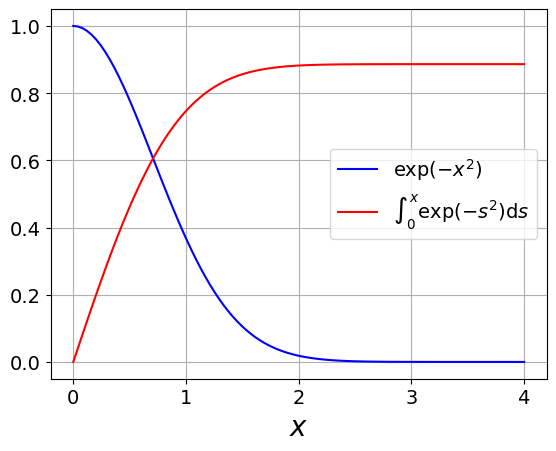

In [18]:
f = lambda x: np.exp(-np.power(x,2.))
fI = np.vectorize(lambda x: integrate.quad(f, 0, x)[0])

x = np.linspace(0,4,100)
plt.figure()
plt.plot(x,f(x),'b-',label='$\exp(-x^2)$')
plt.plot(x,fI(x),'r-',label='$\int_0^x \exp(-s^2)\mathrm{d}s$')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('$x$')
plt.show()

## How we do find both roots?

In [19]:
# root finding
from scipy.optimize import root
f = lambda x: 2*x - 0.5 * np.exp(x)
sol = root(f, 0.3)
print(sol)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 3.574e-01]
  method: hybr
    nfev: 7
    fjac: [[-1.000e+00]]
       r: [-1.285e+00]
     qtf: [ 1.477e-14]


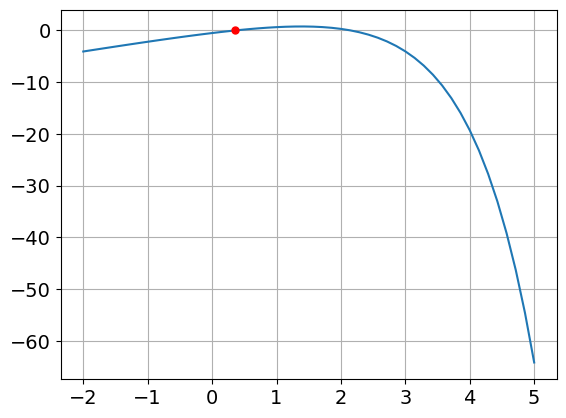

In [20]:
x = np.linspace(-2,5)
plt.figure()
plt.plot(x,f(x),'-')
plt.plot(sol.x,0,'r.',markersize=10)
plt.grid(True)
plt.show()


<div id='advanced' />

# Advanced examples
[Back to TOC](#toc)

## This is why we strongly suggest to avoid using the inverse of a matrix.

When solving a linear system of equations of the form $A\,\mathbf{x}=\mathbf{b}$ we traditionally think in the solution of the following form $\mathbf{x}=A^{-1}\,\mathbf{b}$, but this expression have at least two interpretations that generate different algorithms:
1. First interpretation:
    1. Compute $A^{-1}$
    2. Find $\mathbf{x}$ by multiplying $A^{-1}$ with $\mathbf{b}$
2. A second interpretation:
    1. Find $\mathbf{x}$ without building $A^{-1}$. This will be discussed in detail in the class later on!
3. A third 'advanced/tricky/unfair' interpretation:
    1. Find $\mathbf{x}$ taking advantage of the properties of $A$.

For general matrix $A$ one would prefer the second alternative given the computation time required to determine $\mathbf{x}$.
This is translated in the number of _elemental operations_ (+,-,*,/) required by each implementation.
However for this particular case, the third alternative will be way better than the previous two, since it takes advantage of what we may know about the matrix $A$.
Here, we will perform a numerical experiment to visualize this.

### How can we 'model' the 'number' of elemental operations in each case?

In [21]:
# Number of samples
m = 5
# Building the different 'sizes' we will use for the matrix A
ns = np.logspace(1,3.5,m,dtype=int)
# Initializing the variables where the computation times will be stored
out_times_alg_1 = np.zeros(m)
out_times_alg_2 = np.zeros(m)
out_times_alg_3 = np.zeros(m)

# Implementing the 'First Interpretation'
def algo_1(A,b):
    Ainv = np.linalg.inv(A)
    return Ainv @ b

# Implementing a 'Second Interpretation'
def algo_2(A,b):
    return np.linalg.solve(A,b)

# Implementing the 'Third Interpretation'
def algo_3(A,b):
    return sp.linalg.solve_triangular(A,b,lower=True)

# Loop over the different matrix sizes 'n'    
for i, n in np.ndenumerate(ns):
    # For simplicity we will use an arbitrary matrix, in this case the 'Hilbert' matrix, see https://en.wikipedia.org/wiki/Hilbert_matrix, which will be also used in the following example.
    # Here, we will only use the triangular inferior part of $A$.
    A = np.tril(spla.hilbert(n),0)
    # Building an arbitrary right-hand-side
    b = np.ones(n)
    # Computing times with the 'magic' %timeit for algo. 1
    out = %timeit -o  algo_1(A,b)
    out_times_alg_1[i] = out.average
    # Computing times with the 'magic' %timeit for algo. 2
    out = %timeit -o  algo_2(A,b)
    out_times_alg_2[i] = out.average
    # Computing times with the 'magic' %timeit for algo. 3
    out = %timeit -o  algo_3(A,b)
    out_times_alg_3[i] = out.average


11.2 μs ± 628 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
6.94 μs ± 76.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
16.9 μs ± 2.31 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
74.3 μs ± 3.7 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
31.8 μs ± 4.55 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
23.5 μs ± 2.12 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
910 μs ± 333 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
527 μs ± 187 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
87.1 μs ± 12.9 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
28.1 ms ± 5.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.42 ms ± 660 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
970 μs ± 357 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.32 s ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
367 ms ± 39.4 ms per loop (mean ± std. dev. of 7 r

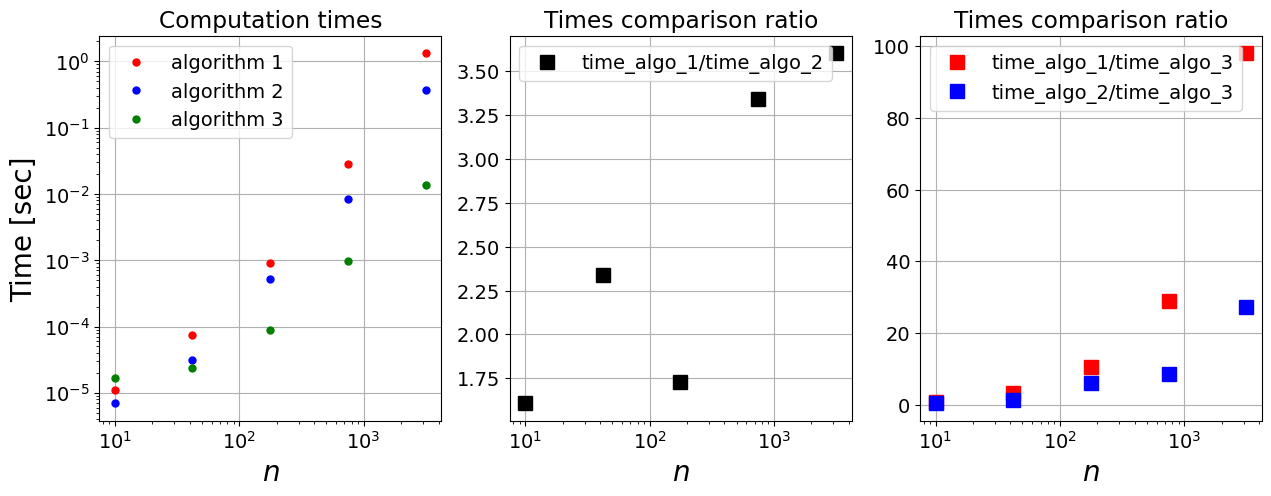

In [22]:
# HINT: It is useful to separate the part of the code that does the computation from the visualization!

# Showing the output
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.loglog(ns,out_times_alg_1,'r.',label='algorithm 1',markersize=10)
plt.loglog(ns,out_times_alg_2,'b.',label='algorithm 2',markersize=10)
plt.loglog(ns,out_times_alg_3,'g.',label='algorithm 3',markersize=10)
plt.xlabel('$n$')
plt.ylabel('Time [sec]')
plt.grid(True)
plt.title('Computation times')
plt.legend(loc='best')

plt.subplot(132)
plt.semilogx(ns,out_times_alg_1/out_times_alg_2,'ks',label='time_algo_1/time_algo_2',markersize=10)
plt.xlabel('$n$')
plt.grid(True)
plt.legend(loc='best')
plt.title('Times comparison ratio')

plt.subplot(133)
plt.semilogx(ns,out_times_alg_1/out_times_alg_3,'rs',label='time_algo_1/time_algo_3',markersize=10)
plt.semilogx(ns,out_times_alg_2/out_times_alg_3,'bs',label='time_algo_2/time_algo_3',markersize=10)
plt.xlabel('$n$')
plt.grid(True)
plt.legend(loc='best')
plt.title('Times comparison ratio')

plt.show()

It would be interesting to compute numerically the asymtotic behavoir of the previous algorithms! This will need to compute computation times for larger values of $n$, which implies more time, but it will be worth it to solve this problem!

## Another numerical experiment to be aware of and the reason why *norms* are useful

When we solve a linear system of equations we need to be aware of the condition number of the matrix involved.
For instance, we will perform a set of numerical examples where we solve a linear system of equations where we know the matrix $A$ and we will define that solution is the vector of ones, i.e. $\mathbf{1}=[1,1,\dots,1]^T$.
This implies that the right-hand-side can be easily computed as follows: $A\,\mathbf{1}=\mathbf{b}$, so now we can give the matrix $A$ to an algorithm and the right-hand-side $\mathbf{b}$ and it will return us an approximation to the solution,
which will be denoted as $\mathbf{x}_a$.
The interesting part about this is that we can compare it with the _true_ solution $\mathbf{x}=\mathbf{1}$.

To compare with the each solution we have two alternatives: (i) compute $\mathbf{x}-\mathbf{x}_a$, or (ii) compute $\mathbf{b}-A\,\mathbf{x}_a$.
These two alternatives are useful be challenging to use since both generate a vector.
For instance, consider that you have two approximations of the solution $\mathbf{x}$ generated by two different algorithms, say $\mathbf{x}_1$ and $\mathbf{x}_2$.
These two approximations will generate the following _errors_ vectors: $\mathbf{x}-\mathbf{x}_1$ and $\mathbf{x}-\mathbf{x}_2$.
Thus, the natural question that arise is the following: how do we determine which approximation is closer to $\mathbf{x}$?
To answer this question we will need to seek for help in _norms_! See more details in the classnotes.
For now we will for simplicity use the well-known Euclidean norm!
So, we can compute the Euclidian norm of the errors, i.e. $\|mathbf{x}-\mathbf{x}_1\|$ and $\|\mathbf{x}-\mathbf{x}_2\|$.
This allows now, based on the Euclidian norm, which approximation is better!
Since they generate a non-negative scalar value, we only need to select the one that generate the lowest value.

Coming back to our original problem, it is convenient to define the following ways to compute the error for the approximations:
1. Forward Error (FE): $\|\mathbf{x}-\mathbf{x}_a\|_2$, i.e. it is a direct comparison between the _true_ solution and the approximation found.
2. Backward Error (BE): $\|\mathbf{b}-A\,\mathbf{x}_a\|_2$, i.e. it an indirect comparison of the error since we know that if $\mathbf{x}_a$ would be the _true_ solution then the norm will zero.

The two error are useful in general for the following reason: We really want the _forward error_ to be as small as possible however we can't ussually compute it since we need to know the _true_ solution $\mathbf{x}$ (recall that we only know it because we built the numerical experiment in that way) thus this is when the _backward error_ becomes important, and the reason is clear, the _backward error_ can always be computed.

In [23]:
N=20
F_errors=np.zeros(N+1)
B_errors=np.zeros(N+1)
F_errors_abs=np.zeros(N+1)
B_errors_abs=np.zeros(N+1)
kappas=np.zeros(N+1)
my_range=np.arange(5,N+1)
for n in my_range:
    A=spla.hilbert(n)
    x_exact=np.ones(n)
    b=np.dot(A,x_exact)
    x=np.linalg.solve(A,b)
    F_errors[n]=np.linalg.norm(x-x_exact)/np.linalg.norm(x_exact)
    F_errors_abs[n]=np.linalg.norm(x-x_exact)
    kappas[n]=np.linalg.cond(A,2)
    B_errors[n]=np.linalg.norm(b-A @ x)/np.linalg.norm(b)
    B_errors_abs[n]=np.linalg.norm(b-A @ x)

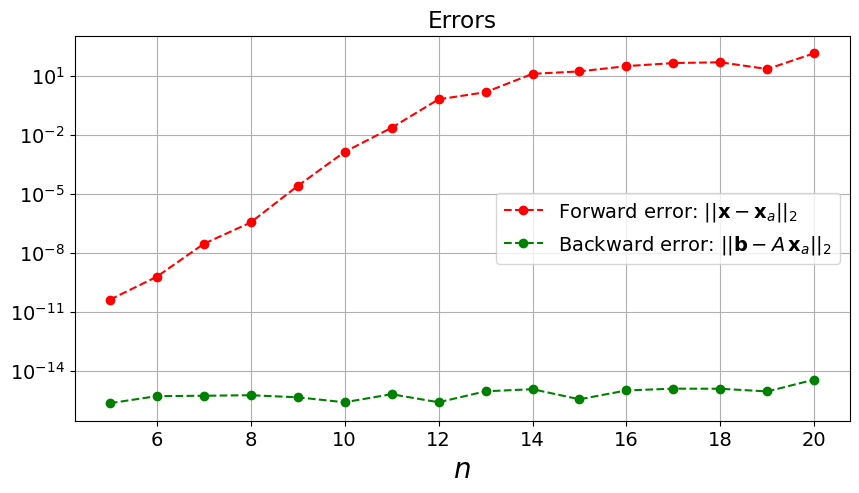

In [24]:
plt.figure(figsize=(10,5))

plt.semilogy(my_range, F_errors_abs[my_range], marker='o', linestyle='--', color='r',label=r'Forward error: $||\mathbf{x}-\mathbf{x}_a||_2$')
plt.semilogy(my_range, B_errors_abs[my_range], marker='o', linestyle='--', color='g',label=r'Backward error: $||\mathbf{b}-A\,\mathbf{x}_a||_2$')
plt.title('Errors')
plt.grid(True)
plt.xlabel('$n$')
plt.legend(loc='best')

plt.show()

The previous experiment showed us an interesting behavior.
We observe that even though the _Backward error_ may be very small for all values of $n$, the _Foorward error_ grows as $n$ increases.
So, *why is this happening?*
To answer this we need to introduce the following inequality:
$$
\dfrac{\|\mathbf{x}-\mathbf{x}_a\|_2}{\|\mathbf{x}\|_2}\leq \kappa_2(A)\, \dfrac{\|\mathbf{b}-A\,\mathbf{x}_a\|_2}{\|\mathbf{b}\|_2},
$$
where $\kappa_2(A)$ is the *condition number* of the matrix $A$ and it is defined in this case as $\|A\|_2\,\|A^{-1}\|_2$.
Notice that $\dfrac{\|\mathbf{x}-\mathbf{x}_a\|_2}{\|\mathbf{x}\|_2}$ is the relative FE and $\dfrac{\|\mathbf{b}-A\,\mathbf{x}_a\|_2}{\|\mathbf{b}\|_2}$ is the relative BE.
We call them relative because they have been _normalized_ by $\|\mathbf{x}\|_2$ and $\|\mathbf{b}\|_2$, respectively.
On the other hand, the not normalized errors are the absolute errors.

Now, to understand the previous discrepancy, we will plot the previous quantities included in the inequality. 


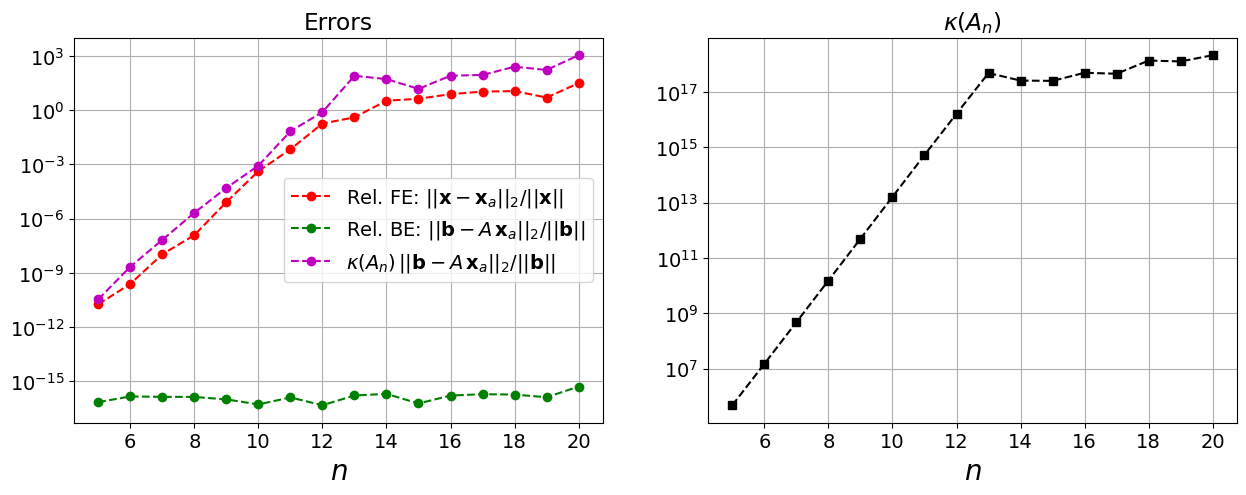

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.semilogy(my_range, F_errors[my_range], marker='o', linestyle='--', color='r',label=r'Rel. FE: $||\mathbf{x}-\mathbf{x}_a||_2/||\mathbf{x}||$')
plt.semilogy(my_range, B_errors[my_range], marker='o', linestyle='--', color='g',label=r'Rel. BE: $||\mathbf{b}-A\,\mathbf{x}_a||_2/||\mathbf{b}||$')
plt.semilogy(my_range, kappas[my_range]*B_errors[my_range], marker='o', linestyle='--', color='m', label=r'$\kappa(A_n)\,||\mathbf{b}-A\,\mathbf{x}_a||_2/||\mathbf{b}||$')
plt.title('Errors')
plt.grid(True)
plt.xlabel('$n$')
plt.legend(loc='best')

plt.subplot(122)
plt.semilogy(my_range, kappas[my_range], marker='s', linestyle='--', color='k',label=r'$\kappa(A_n)$')
plt.title(r'$\kappa(A_n)$')
plt.xlabel('$n$')
plt.grid(True)

plt.show()

The conclusion is clear, tha matrix $A$, in this case the Hilbert matrix, is very *ill-conditioned*! 
This means it has a very large condition number $\kappa_2(A)$.
From the numerical point of view, if a matrix is ill-conditioned, we can't expect a small _Forward Error_!
This seems contradictory, but actually it happens very often.
So, what can we do in these cases? We could use preconditioners, but that is out of scope here.

Final lessons: 
1. Ask yourself if there are better algorithms for solving a linear system of equations that just trying the 'simple but slow algorithm', this could save you a lot of time!
2. Ask yourself about the condition number of the matrix you are working with, if it is too large, you need to do something before trying to solve that linear system of equations!

## Some questions:
1. Are there any other vector norms? How can they be computed with NumPy?
2. Determine $\max_{\|\mathbf{x}\|_2=1} \left\|A\,\mathbf{x}\right\|_2$, where $A=\begin{bmatrix} 1 & 2 \\ 3 & 10\end{bmatrix}$.
3. Determine $\max_{\|\mathbf{x}\|_1=1} \left\|A\,\mathbf{x}\right\|_1$, where $A=\begin{bmatrix} 1 & 2 \\ 3 & 10\end{bmatrix}$.
4. Determine $\max_{\|\mathbf{x}\|_\infty=1} \left\|A\,\mathbf{x}\right\|_\infty$, where $A=\begin{bmatrix} 1 & 2 \\ 3 & 10\end{bmatrix}$.
5. What is a matrix norm induced by a vector norm?
6. Provide an example of a matrix norm that is not induced by a vector norm.
7. Determine the max value of $c_1$ and min value of $c_2$ such that $c_1\,\|\mathbf{x}\|_1 \leq \|\mathbf{x}\|_2\leq c_2\, \|\mathbf{x}\|_1$ for any vector in $\mathbb{R}^2$.
8. Consider that $\mathbf{q}_1$ and $\mathbf{q}_2$ are two orthonormal vectors, what can you say about $\|\mathbf{q}_1+\mathbf{q}_2\|_2$ and $\|\mathbf{q}_1\|_2+\|\mathbf{q}_2\|_2$.
9. Compute the spectral radious of $A=\begin{bmatrix} 1 & 2 \\ 3 & 10\end{bmatrix}$.

<div id='libraries' />

# Libraries
[Back to TOC](#toc)

### Please make sure you make all of them your BFF!!

* NumPy: https://www.nature.com/articles/s41586-020-2649-2
* Matplotlib: http://matplotlib.org/examples/pylab_examples/simple_plot.html
* Scipy.org: https://www.scipy.org
* SymPy: https://www.sympy.org/en/index.html
* IEEE 754 Floating Point Special Values: https://docs.scipy.org/doc/numpy-1.10.0/user/misc.html

<div id='acknowledgements' />

# Acknowledgements
[Back to TOC](#toc)

* _Material originally created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`). v.1.0. DI UTFSM. August 2023._
* _Update August 2023 - v1.01 - C.Torres_ : Including Ariane Carvajal's suggestions.
* _Update August 2023 - v1.02 - C.Torres_ : Including another Ariane Carvajal's suggestion.

<div id='NumericalSolutions' />

# "Some" numerical solutions
[Back to TOC](#toc)

## Numerical solutions

### Answer question 1
1. Are there any other vector norms? How can they be computed with NumPy?
_Yes, there are many more vectors norms and they can be computed in Numpy as ```np.linalg.norm(x,ord=p)```_, where ```p``` is usually $1$, $2$ or $\infty$.
We suggest to look at [https://numpy.org/doc/stable/reference/routines.linalg.html](https://numpy.org/doc/stable/reference/routines.linalg.html)

In [26]:
# For instance:
x = np.array([1., 2.])
print('x=',x)
for p in [1,2,np.inf]:
    print('The norm p=',p, ' of x is ',np.linalg.norm(x,p))
# Notice that is the vector is null, all the three norms produce the same:
print('Notice that is the vector is null, all the three norms produce the same:')
x = np.array([0., 0.])
print('x=',x)
for p in [1,2,np.inf]:
    print('The norm p=',p, ' of x is ',np.linalg.norm(x,p))


x= [1. 2.]
The norm p= 1  of x is  3.0
The norm p= 2  of x is  2.23606797749979
The norm p= inf  of x is  2.0
Notice that is the vector is null, all the three norms produce the same:
x= [0. 0.]
The norm p= 1  of x is  0.0
The norm p= 2  of x is  0.0
The norm p= inf  of x is  0.0


### Answer question 2
2. Determine $\max_{\|\mathbf{x}\|_2=1} \left\|A\,\mathbf{x}\right\|_2$, where $A=\begin{bmatrix} 1 & 2 \\ 3 & 10\end{bmatrix}$.

To anaswer this question, it is useful to recall the three properties that any norm must satisfy:
1. $\|\mathbf{x}\|\geq 0$, and if $\|\mathbf{x}\|=0$, it implies that $\mathbf{x}=\mathbf{0}$, i.e. the null vector.
2. $\|\mathbf{x}+\mathbf{y}\|\leq \|\mathbf{x}\|+\|\mathbf{y}\|$. This means it must satisfy the triangular inequality.
3. $\|\alpha\,\mathbf{x}\|=|\alpha|\,\|\mathbf{x}\|$.

So, to answer the question numerically (it can also be solve algebraically but the focus in this jupyter notebook is numerically!) we can take advantage of the property 3 mentione above.
This means, we can define a vector parametrically such that it satifies the constraint $\|\mathbf{x}\|=1$.
To build that vector, we can express the norm explicitly, consider $\mathbf{x}=[x_1,x_2]$, thus $\|\mathbf{x}\|=\sqrt{x_1^2+x_2^2}$, and if we equally to $1$ we can get rid of the square root, thus,
$$
x_1^2+x_2^2=1
$$
To visualize what it means, we can make a plot:

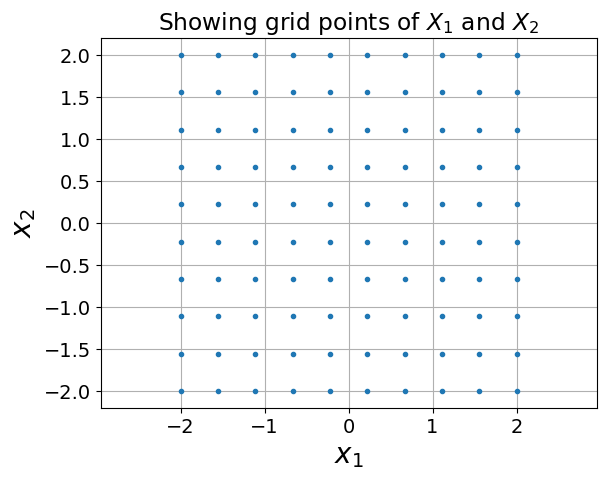

In [27]:
plt.figure()
# Using 'low' resolution for the grid just for plotting porpuse, we will increase the resolution for the isocontour
x1 = np.linspace(-2,2,10)
x2 = np.linspace(-2,2,10) 
# Building a 2D grid
X1 , X2 = np.meshgrid(x1,x2)
# To understand the meaning of this grid, we will plot it.
plt.plot(X1.flatten(),X2.flatten(),'.')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.title('Showing grid points of $X_1$ and $X_2$')
plt.show()

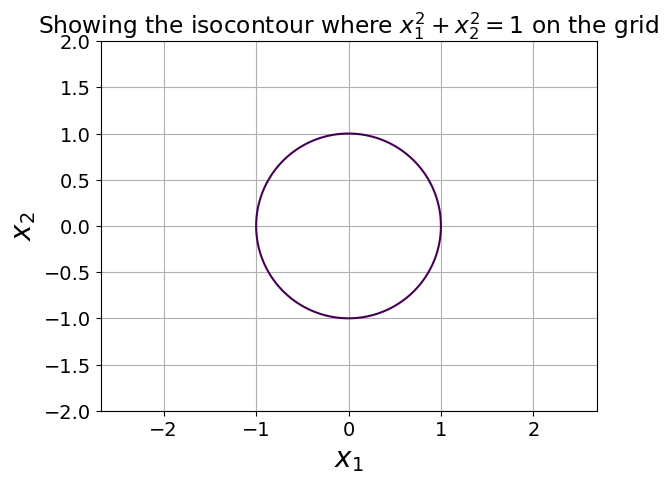

In [28]:
plt.figure()
# Using a 'higher' resolution now
x1 = np.linspace(-2,2,100)
x2 = np.linspace(-2,2,100) 
# Building a 2D grid
X1 , X2 = np.meshgrid(x1,x2)
# Plotting contour
plt.contour(X1,X2,np.power(X1,2)+np.power(X2,2), levels=[1])
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.title('Showing the isocontour where $x_1^2+x_2^2=1$ on the grid')
plt.show()

The conclusion is that it is justa circle of radious equal to $1$.
The good news is that we can easily describe all the points on the circle parametrically as follows:
$$
\mathbf{x}(\theta) = [\cos(\theta), \sin(\theta)], \quad \text{for $\theta\in[0,2\,\pi]$.}
$$
Thus, we can also plot the circle without using the numerically expensive ```plt.contourf``` procedure.

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/var/folders/9y/fwh0nfx16wd6199vf_40_xkr0000gn/T/ipykernel_33257/3852265840.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Showing the parametric curve $\mathbf{x}(\\theta)$')


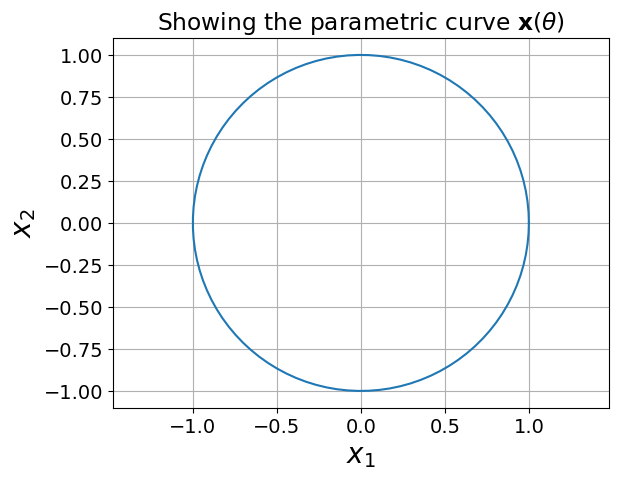

In [29]:
plt.figure()
# Defining the independent varable
theta = np.linspace(0,2*np.pi,100)
# It may be better to implement this for each component, but it will be better this way for answering the question next.
x = lambda s: np.array([np.cos(s),np.sin(s)])
# Plotting the parametric curve x
plt.plot(x(theta)[0],x(theta)[1],'-')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.axis('equal')
plt.title('Showing the parametric curve $\mathbf{x}(\\theta)$')
plt.show()

Now, we know what $\mathbf{x}=1$ means.
The next step it to visualize what the matrix does to the set of vectors on the unitary circle.

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/var/folders/9y/fwh0nfx16wd6199vf_40_xkr0000gn/T/ipykernel_33257/2388047038.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Plotting $\mathbf{x}(\\theta)$ and $A\,\mathbf{x}(\\theta)$')


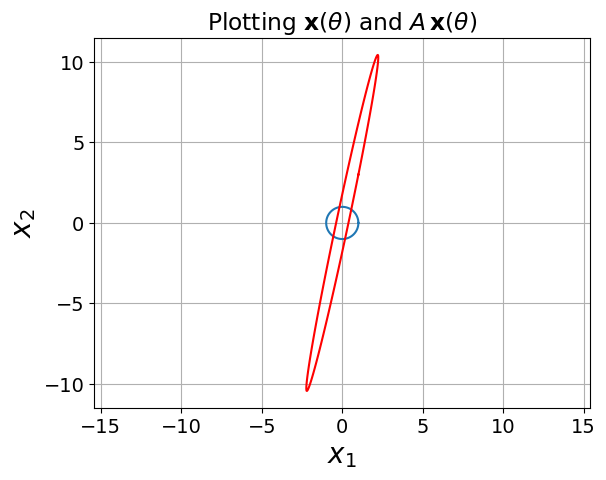

In [30]:
plt.figure()
# Defining the independent varable
theta = np.linspace(0,2*np.pi,100)
# Parametrix representation of x
x = lambda s: np.array([np.cos(s),np.sin(s)])
A = np.array([[1,2],[3,10]])
Ax = lambda s: A @ x(s)
# Plotting the parametric curve x
plt.plot(x(theta)[0],x(theta)[1],'-')
# Plotting the parametric curve transformed by A
plt.plot(Ax(theta)[0],Ax(theta)[1],'r-')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.axis('equal')
plt.title('Plotting $\mathbf{x}(\\theta)$ and $A\,\mathbf{x}(\\theta)$')
plt.show()

So, what is the $\max$?
We can find it numerically with the following plot:

The max values is:  10.670459923115347


<>:20: SyntaxWarning: invalid escape sequence '\|'
<>:20: SyntaxWarning: invalid escape sequence '\|'
/var/folders/9y/fwh0nfx16wd6199vf_40_xkr0000gn/T/ipykernel_33257/2796189535.py:20: SyntaxWarning: invalid escape sequence '\|'
  plt.ylabel('$\|\|A\,\mathbf{x}(\\theta)\|\|$')


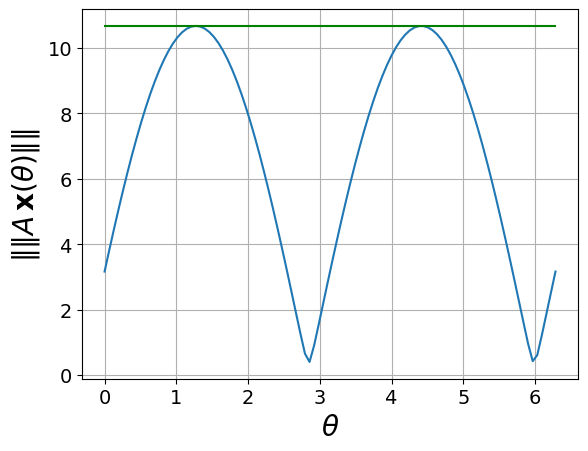

In [31]:
plt.figure()
# Defining the independent varable
theta = np.linspace(0,2*np.pi,100)
# Parametrix representation of x
x = lambda s: np.array([np.cos(s),np.sin(s)])
A = np.array([[1.,2.],[3.,10.]])
Ax = lambda s: A @ x(s)
# Plotting the parametric curve transformed by A
Ax_value = np.linalg.norm(Ax(theta), ord=2, axis=0)
plt.plot(theta,Ax_value,'-')

# Finding the max on the grid. Notice this may not be the exact value, it is just the max on the grid.
theta_i_max = np.argmax(Ax_value)
plt.plot(theta, theta*0+Ax_value[theta_i_max],'g-')

print('The max values is: ', Ax_value[theta_i_max])

plt.grid(True)
plt.xlabel('$\\theta$')
plt.ylabel('$\|\|A\,\mathbf{x}(\\theta)\|\|$')
plt.show()

Therefore we found the maximum numerically. Now, consider the following code:

In [32]:
A = np.array([[1.,2.],[3.,10.]])
print(np.linalg.norm(A,2))

10.670495579087131


Do you see any connection?

_Yes, they are the almost the same. What we just did is the computation of the norm 2 of a matrix!_

#### Bonus: Showing the other isocontours.

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/var/folders/9y/fwh0nfx16wd6199vf_40_xkr0000gn/T/ipykernel_33257/1680469542.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Blue: $|x_1|^2+|x_2|^2=1$, red: $|x_1|+|x_2|=1$, and green: $\max(|x_1|,|x_2|)=1$')


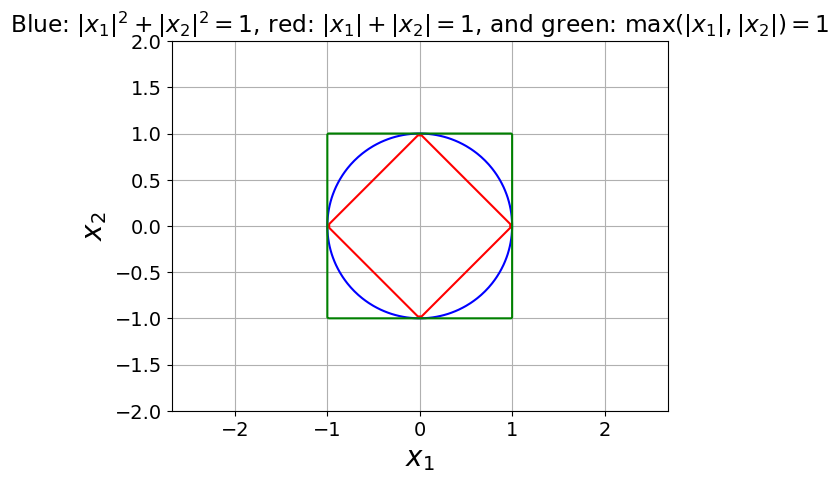

In [33]:
plt.figure()
# Using a 'higher' resolution now
x1 = np.linspace(-2,2,100)
x2 = np.linspace(-2,2,100) 
# Building a 2D grid
X1 , X2 = np.meshgrid(x1,x2)
# Plotting contours
plt.contour(X1,X2,np.power(X1,2)+np.power(X2,2), levels=[1], colors=['blue'])
plt.contour(X1,X2,np.abs(X1)+np.abs(X2), levels=[1], colors=['red'])
plt.contour(X1,X2,np.maximum(np.abs(X1),np.abs(X2)), levels=[1], colors=['green'])
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.title('Blue: $|x_1|^2+|x_2|^2=1$, red: $|x_1|+|x_2|=1$, and green: $\max(|x_1|,|x_2|)=1$')
plt.show()

### Answers questions 5 and 6

5. What is a matrix norm induced by a vector norm? _It is basaically what we just did!_

The definition of a matrix norm induced by a vector norm is as follows. Consider $\mathbf{x}\in\mathcal{R}^n$ and $A\in\mathcal{n \times n}$.
$$
\max_{\|\mathbf{x}\|_p\neq 0} \dfrac{\|A\,\mathbf{x}\|_p}{\|\mathbf{x}\|_p} = \max_{\|\mathbf{x}\|_p= 1} \|A\,\mathbf{x}\|_p = \|A\|_p
$$
For which we know some facts:
- $\|A\|_1=\max_j \|\mathbf{a}_j\|_1$, where $\mathbf{a}_j$ corresponds to the $j$-th **column** of $A$, i.e. it is tha max norm-1 among all the columns of $A$.
- $\|A\|_\infty = \max_j \|\mathbf{r}_j\|_1$, where $\mathbf{r}_j$ corresponds to the $j$-th **row** of $A$, i.e. it is tha max norm-1 among all the rows of $A$. It is not a mistake to say we use the norm-1 among the rows of $A$ to compute its infinity norm.
- $\|A\|_2=\sigma_1$, where $\sigma_1$ corresponds to the greatest **singular value** of $A$.

Just as a reminder, consider the traditional vector norms:
- $\|\mathbf{x}\|_1 = \sum_{i=1}^n |x_i|$.
- $\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n |x_i|^2}$.
- $\|\mathbf{x}\|_\infty = \max_{i\in\{1,2,\dots,n\}} |x_i|$. 

6. Provide an example of a matrix norm that is not induced by a vector norm.

Sometime the matrix norm-2 may have couse confusion with the Frobenoius norm, the confusion is the following:
- Vector 2 norm: $\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n |x_i|^2}$.
- Matrix 2 norm: $\|A\|_2=\max_{\|\mathbf{x}\|_2\neq 0} \dfrac{\|A\,\mathbf{x}\|_2}{\|\mathbf{x}\|_2} =\max_{\|\mathbf{x}\|_2=1} \left\|A\,\mathbf{x}\right\|_2=\sigma_1$, where $\sigma_1$ corresponds to the greatest **singular value** of $A$.
- Matrix norm - Frobenoious: $\|A\|_2 = \sqrt{\sum_{j=1}^n \sum_{i=1}^n |A_{i,j}|^2}$, which can be re-written as $\|A\|_2 = \sqrt{\sum_{j=1}^n \|\mathbf{a}_j\|_2^2}$.

Thus, the Frobenious norm is a matrix norm that is not induced by a vector norm but it looks like the vector 2-norm.

#### Answer to question 7

7. Determine the max value of $c_1$ and min value of $c_2$ such that $c_1\,\|\mathbf{x}\|_1 \leq \|\mathbf{x}\|_2\leq c_2\, \|\mathbf{x}\|_1$ for any vector in $\mathbb{R}^2$.

Here the point is that we have the same vector but different norm on the inequality.
This questions actually shows that the vector norms 1 and 2 are _equivalent_, actually, all finite dimensional norms are _equivalent_!

A simple approach can be similar to what we did before and also takes advantage of the third property of a vector norm, i.e. $\|\alpha\,\mathbf{x}\|=|\alpha|\,\|\mathbf{x}\|$.
So, we can simply use a unitary vector (in one of the two metrics) since any vector can be built scaling a unitary vector.
Recall that the third property mentioned holds for any norm.
Now, for simplicity we can set $\|\mathbf{x}\|=1$ by means of the parametrization built before, i.e.
$$
\mathbf{x}(\theta) = [\cos(\theta), \sin(\theta)], \quad \text{for $\theta\in[0,2\,\pi]$.}
$$
which implies $\|\mathbf{x}(\theta)\|_2=1$. This implies the following:
$$
\begin{align*}
    c_1 \|\mathbf{x}\|_1 \leq \|\mathbf{x}\|_2 &\leq c_2 \|\mathbf{x}\|_1\\
    c_1 \|\mathbf{x}\|_1 \leq 1 &\leq c_2 \|\mathbf{x}(\theta)\|_1.
\end{align*}
$$
from which we derive:
$$
\begin{align*}
c_1 & \leq \dfrac{1}{\|\mathbf{x}(\theta)\|_1}, \\
\dfrac{1}{\|\mathbf{x}(\theta)\|_1} & \leq c_2.
\end{align*}
$$
So, since we know $\mathbf{x}(\theta)\neq \mathbf{0}$, we will not reach a zero division, we can plot it and find $c_1$ and $c_2$:

c1= 0.7071067833678788
c2= 1.0


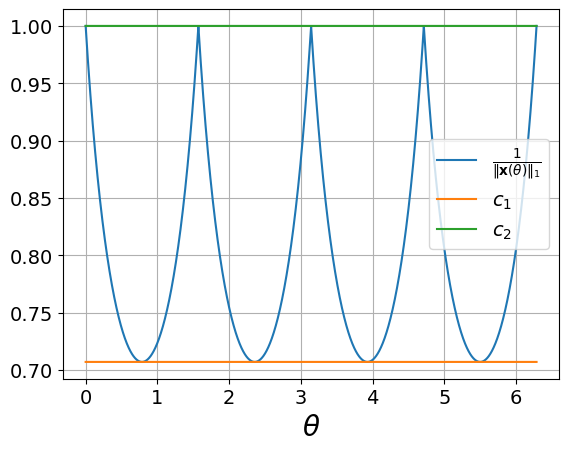

In [34]:
plt.figure()
theta = np.linspace(0,2*np.pi,10000)
x = lambda s: np.array([np.cos(s),np.sin(s)])
y = np.linalg.norm(x(theta),ord=1, axis=0)
plt.plot(theta,1/y, label='$\\frac{1}{\\|\\mathbf{x}(\\theta)\\|_1}$')
plt.grid(True)
plt.xlabel('$\\theta$')

# Finding the min and max on the grid. Notice this may not be the exact value, it is just the min and max on the grid.
theta_i_min = np.argmin(1/y)
theta_i_max = np.argmax(1/y)
c1 = 1/y[theta_i_min] # The min value gives us the max values for c1! why?!
c2 = 1/y[theta_i_max] # The max value gives us the min values for c2! why?!
plt.plot(theta, theta*0+c1,'-', label='$c_1$')
plt.plot(theta, theta*0+c2,'-', label='$c_2$')
plt.legend(loc='best')
print('c1=',c1)
print('c2=',c2)
plt.show()

Now, for completeness, we will plot both norms with the constant $c$ scaling $\|\mathbf{x}(\theta)\|_1$ to verify if the inequality holds.

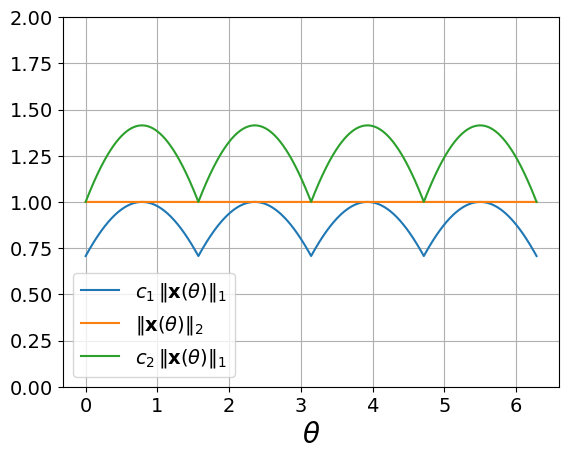

In [35]:
plt.figure()
theta = np.linspace(0,2*np.pi,10000)
x = lambda s: np.array([np.cos(s),np.sin(s)])
y1 = np.linalg.norm(x(theta),ord=1, axis=0)
y2 = np.linalg.norm(x(theta),ord=2, axis=0) # We know this is 1 but we will compute it anyways.
plt.plot(theta,c1*y1,   label='$c_1\\,\\|\\mathbf{x}(\\theta)\\|_1$')
plt.plot(theta,y2,      label='$\\|\\mathbf{x}(\\theta)\\|_2$')
plt.plot(theta,c2*y1,   label='$c_2\\,\\|\\mathbf{x}(\\theta)\\|_1$')
plt.grid(True)
plt.xlabel('$\\theta$')
plt.legend(loc='best')
plt.ylim([0,2])
plt.show()

This shows that the inequalities hold for all values of $\theta$, which is what we wanted!